# FEATURE ENGINEERING

### We are firstly going to see our outliers among our numerical continuous columns 

In [54]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import plot_confusion_matrix
%matplotlib inline

In [32]:
data=pd.read_csv("train_prepar.csv")
data1=pd.read_csv("test_prepar.csv")
data.head(10)

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age,YEAR_EMPLOYED
0,0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,...,0,0,0.000000,0.000,0.000000,0.000000,0.000000,1.000000,25.920548,1.745205
1,1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,...,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,45.931507,3.254795
2,2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,...,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,52.180822,0.616438
3,3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,...,0,0,0.006402,0.007,0.034362,0.267395,0.265474,1.899974,52.068493,8.326027
4,4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,...,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,54.608219,8.323288
5,5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,...,0,0,0.000000,0.000,0.000000,0.000000,1.000000,1.000000,46.413699,4.350685
6,6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,...,0,0,0.000000,0.000,0.000000,1.000000,1.000000,2.000000,37.747945,8.575342
7,7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,...,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,51.643836,1.230137
8,8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,...,0,0,0.000000,0.000,0.000000,0.000000,0.000000,1.000000,55.065753,-1000.665753
9,9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,...,0,0,0.006402,0.007,0.034362,0.267395,0.265474,1.899974,39.641096,5.531507


In [33]:
data=data.drop(['Unnamed: 0'],axis=1)

In [34]:
numerical=[var for var in data.columns if data[var].dtypes!='object']
print("there are {} numericals columns".format(len(numerical)))

there are 90 numericals columns


In [35]:
continuous = []#we want to see the number of continous values columns
for var in numerical:
    if len(data[var].unique())>3:
        continuous.append(var)
        
print('There are {} continuous variables'.format(len(continuous)))

There are 55 continuous variables


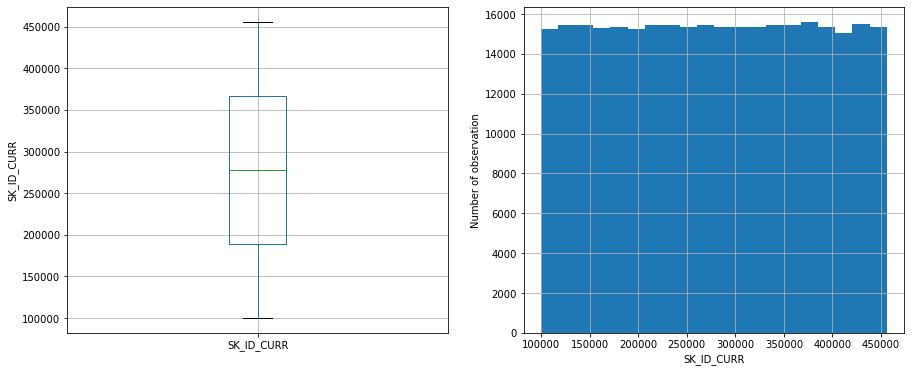

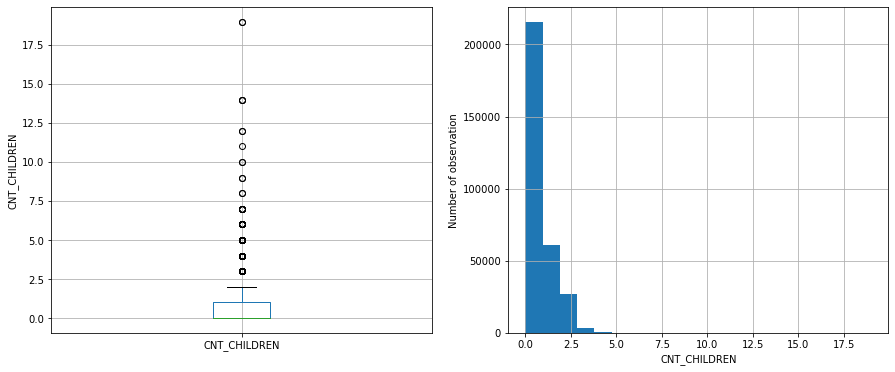

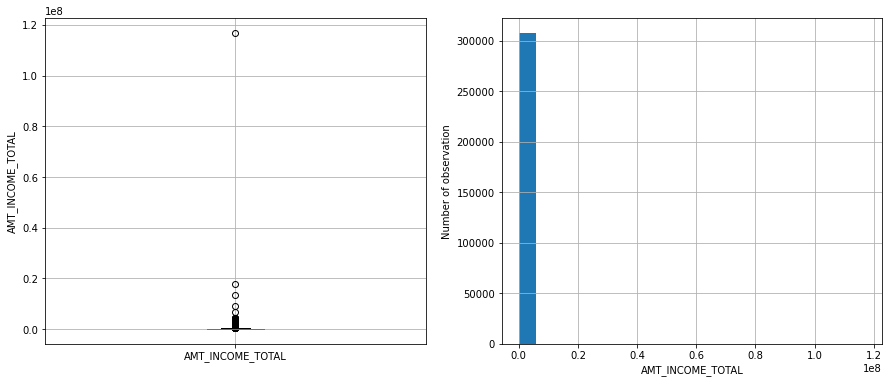

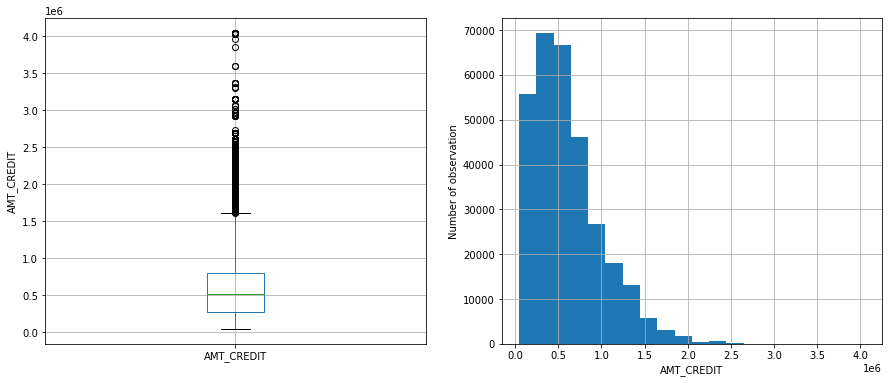

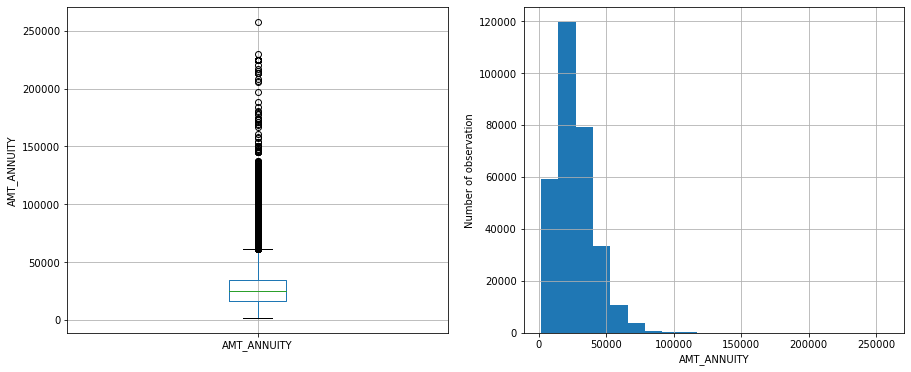

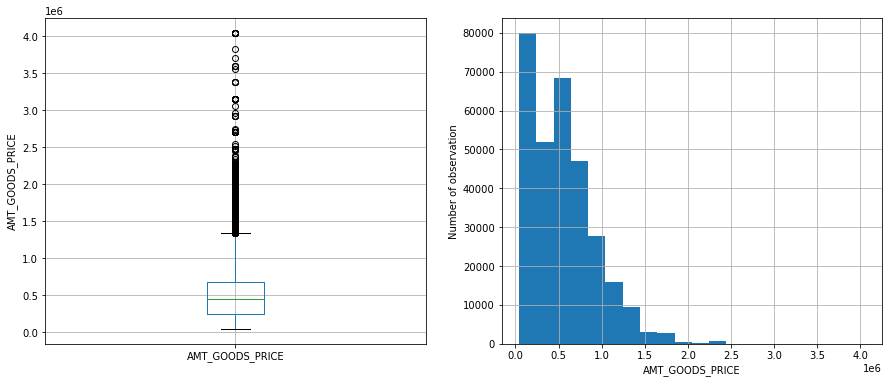

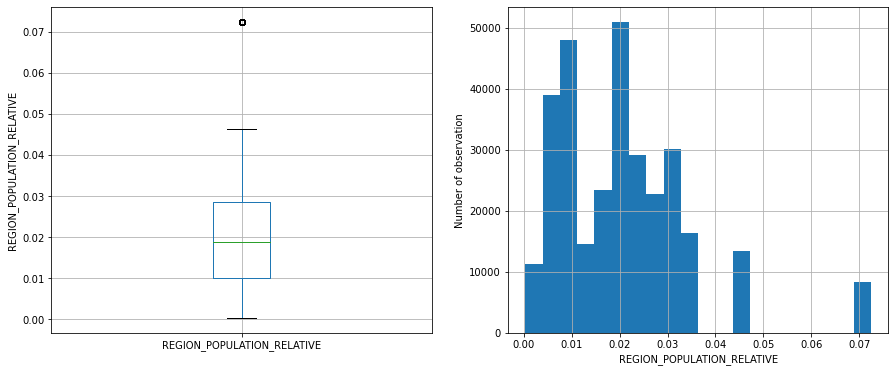

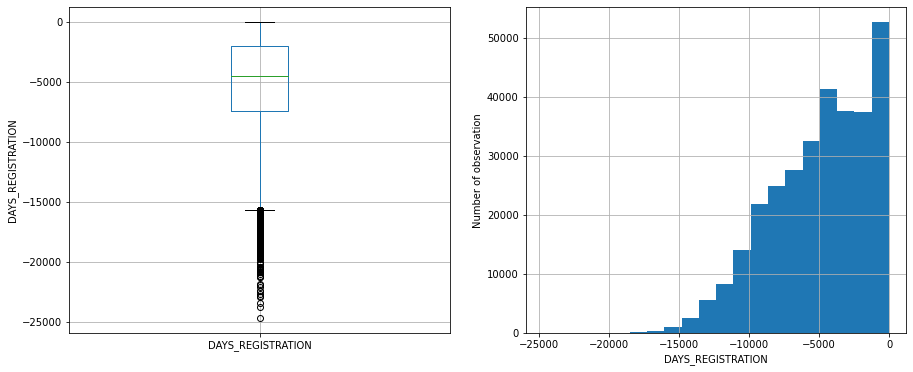

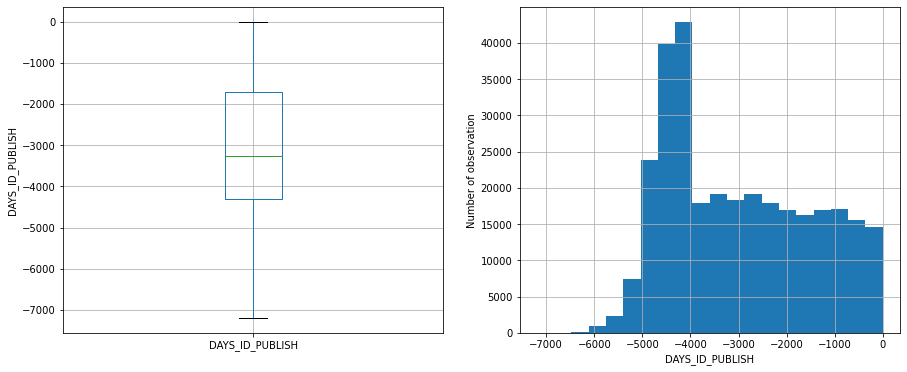

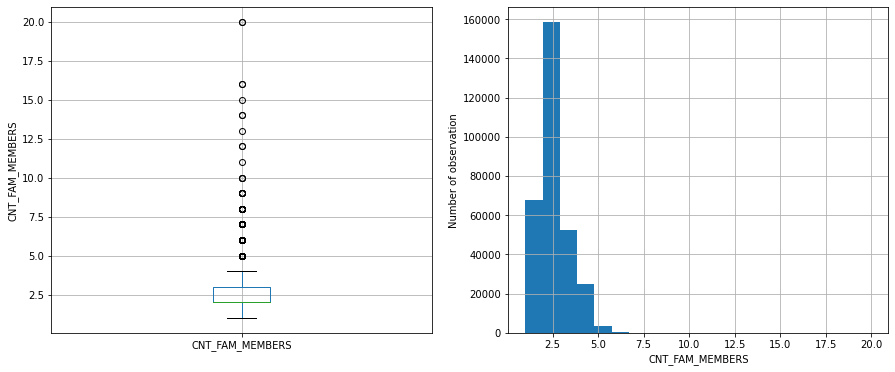

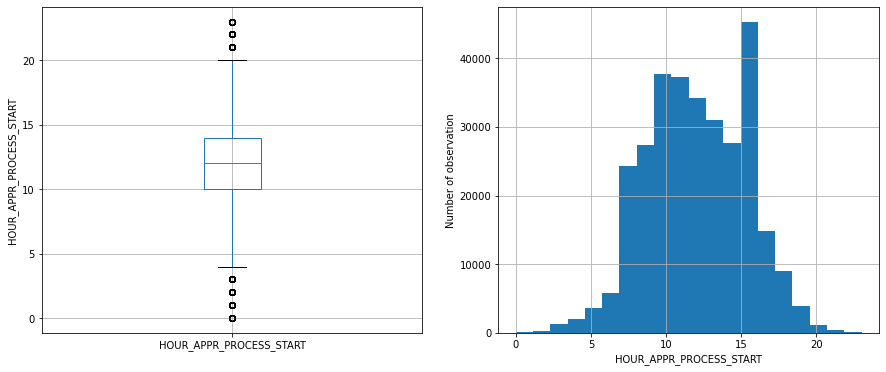

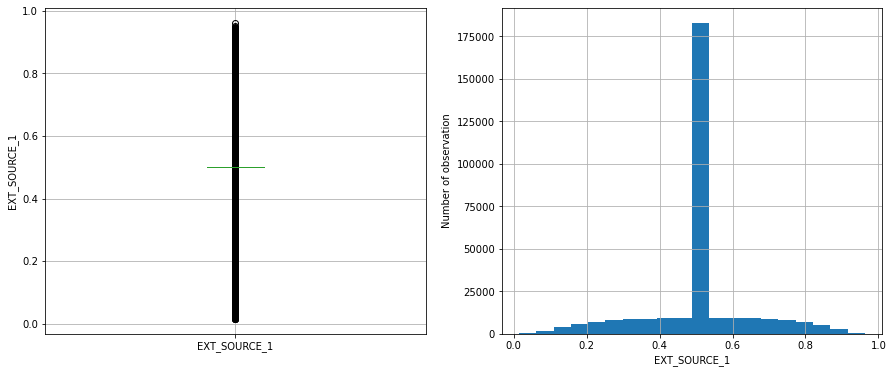

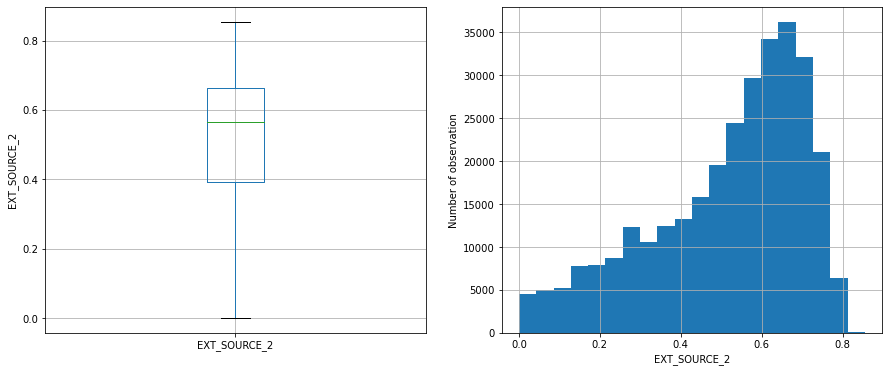

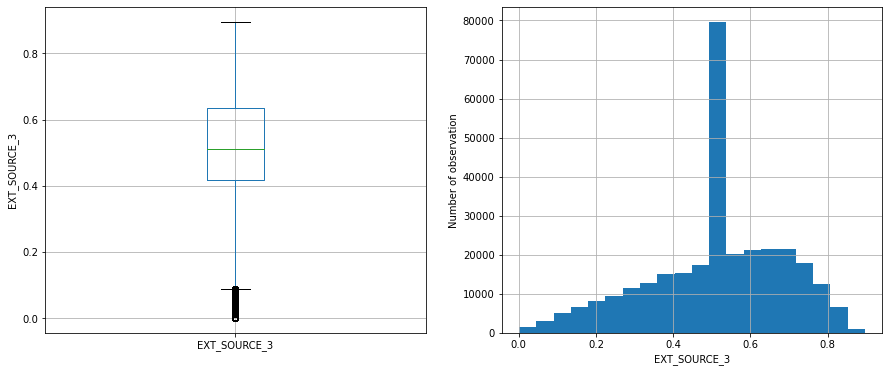

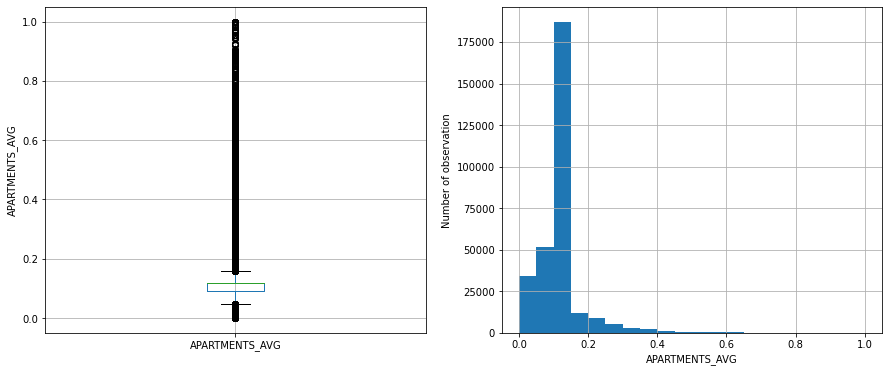

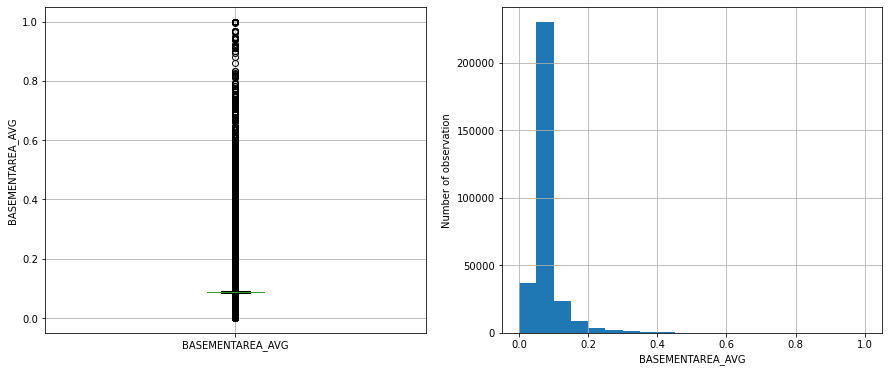

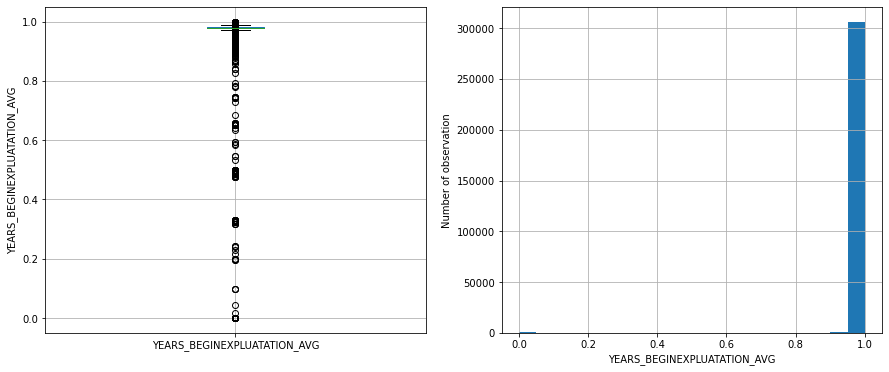

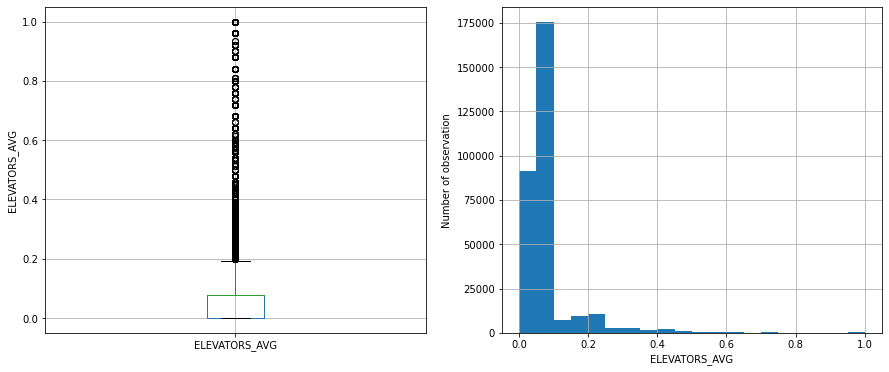

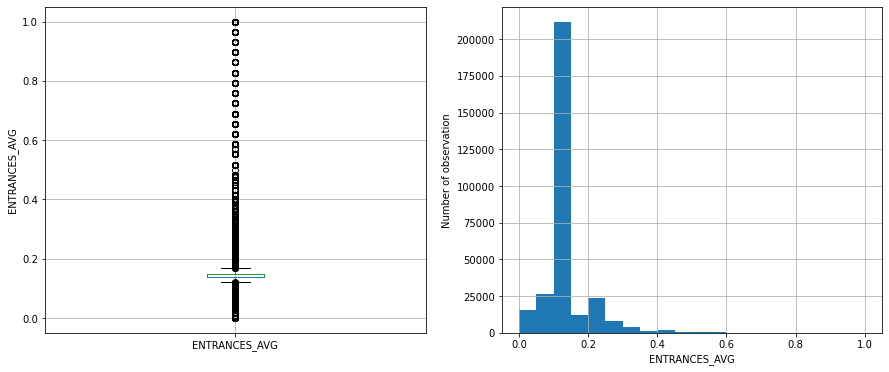

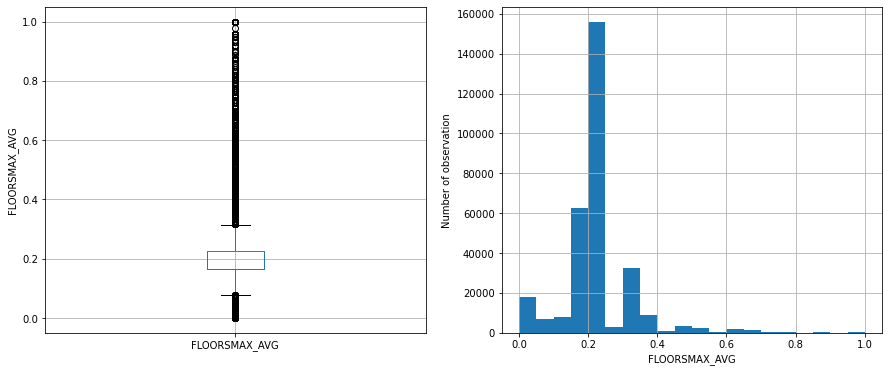

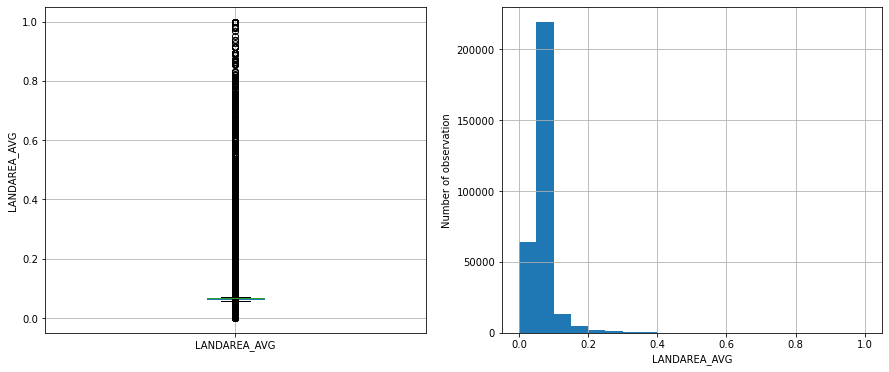

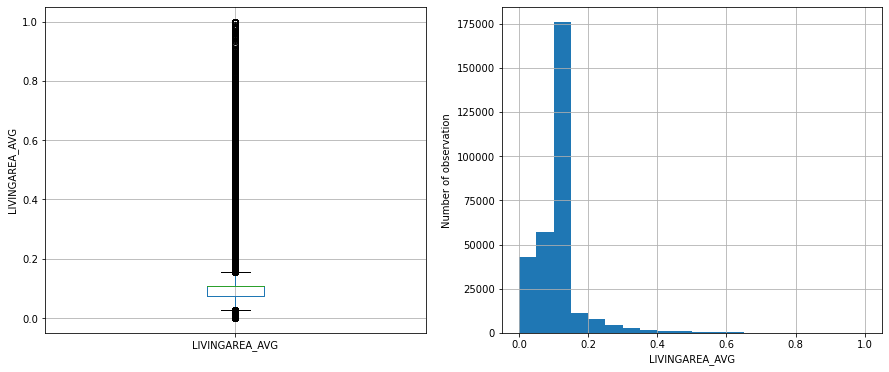

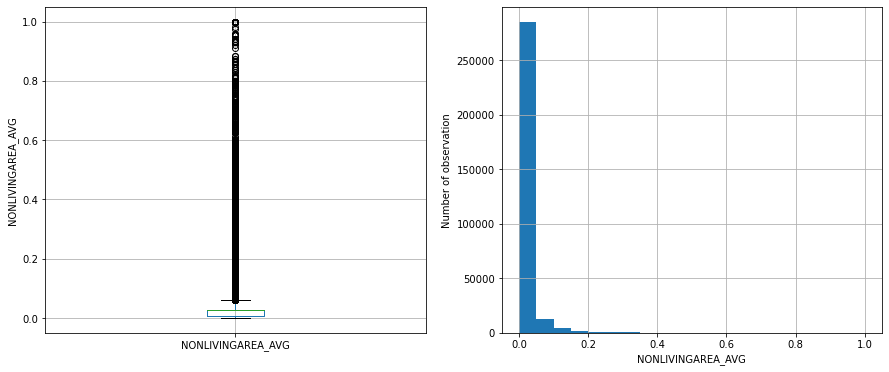

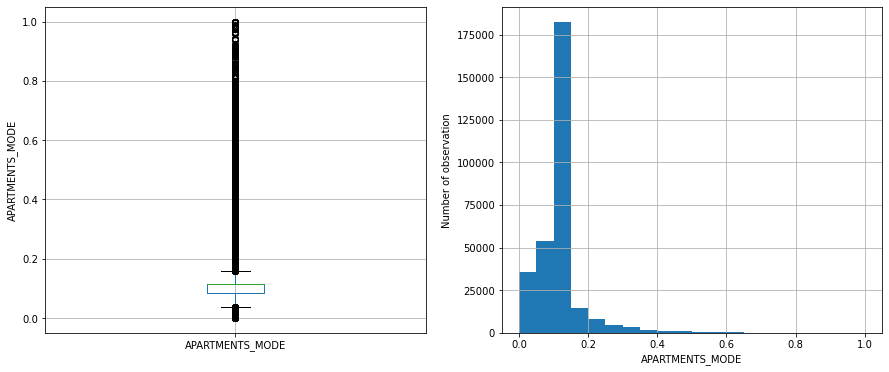

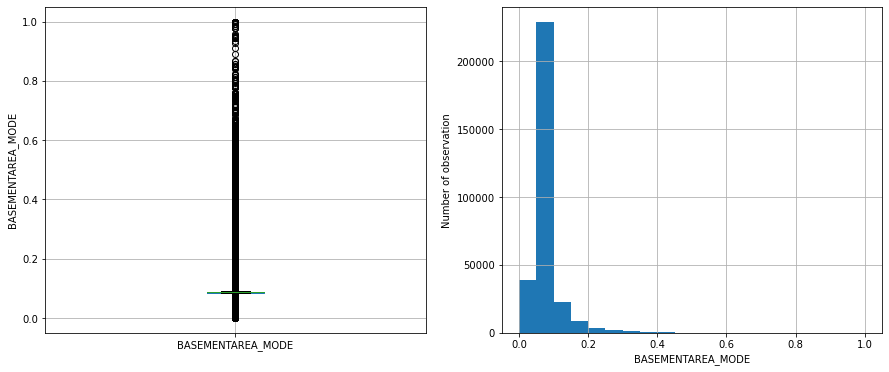

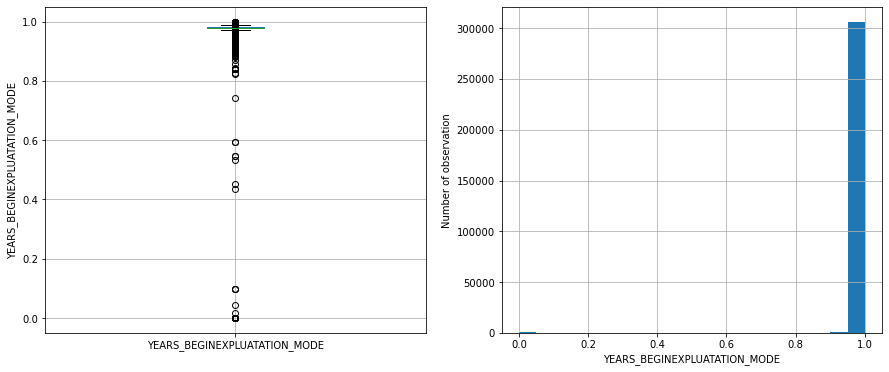

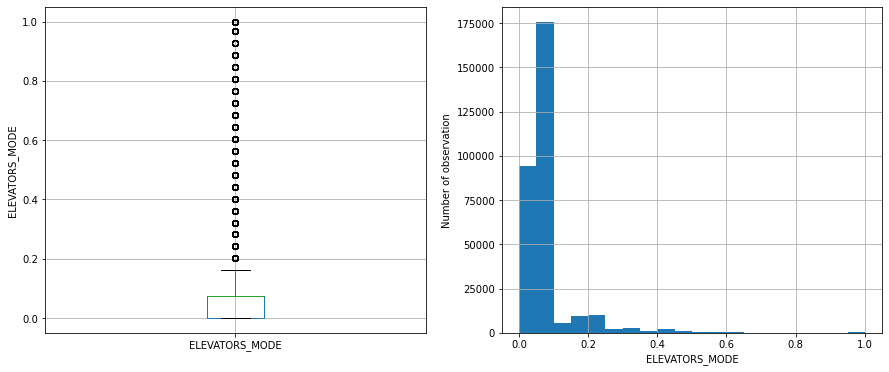

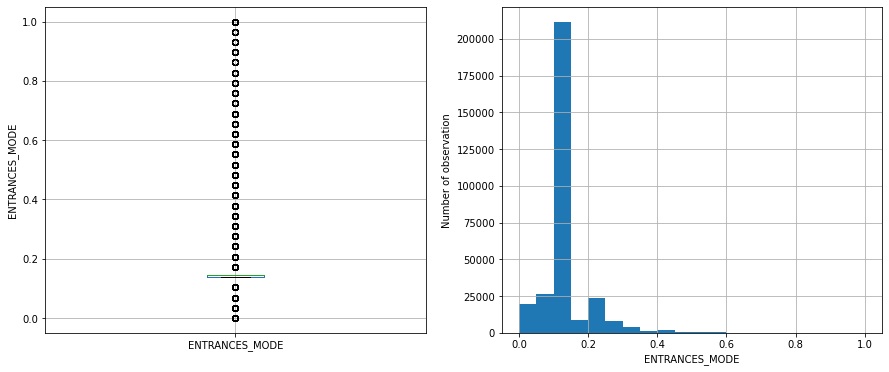

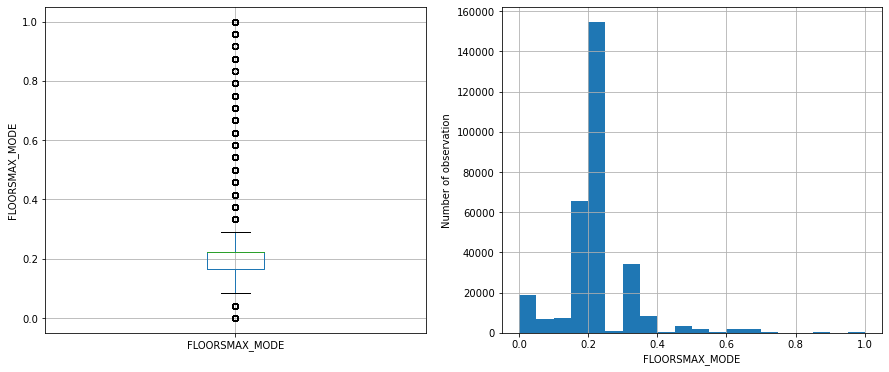

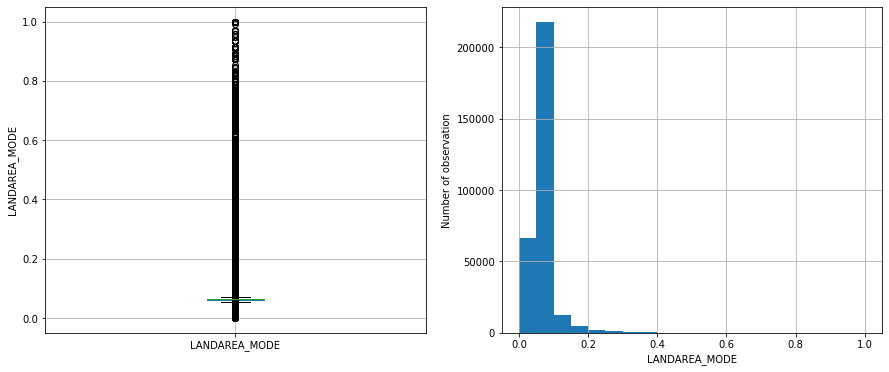

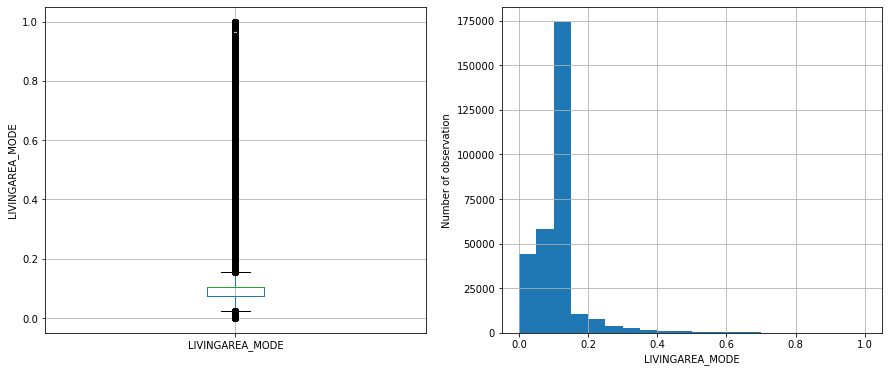

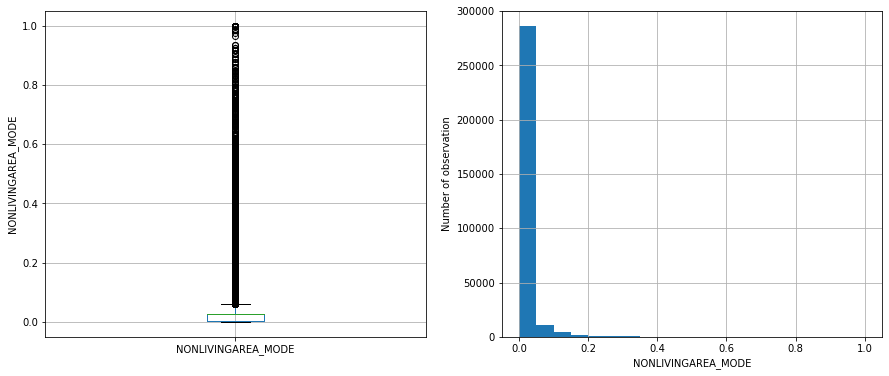

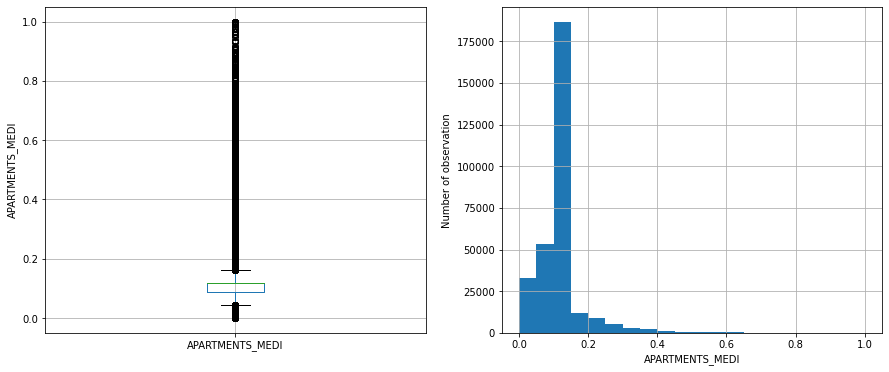

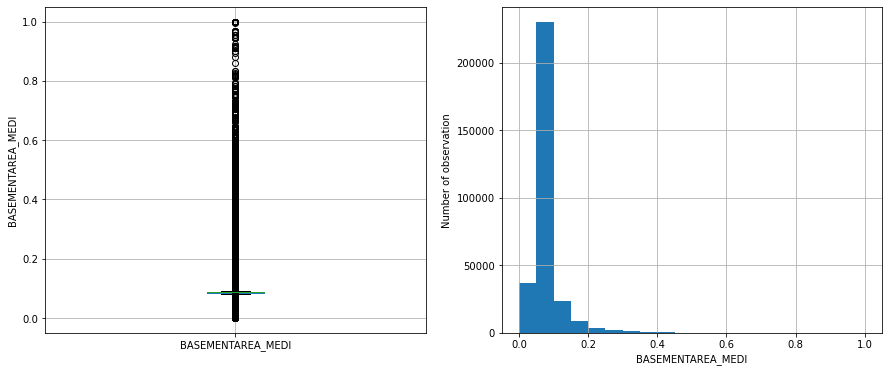

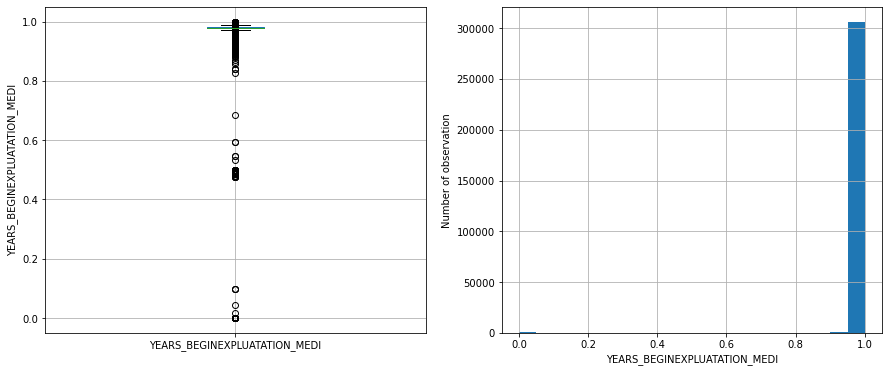

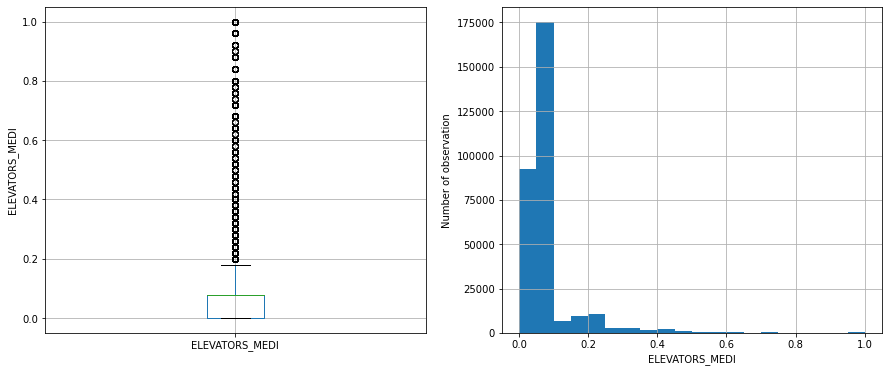

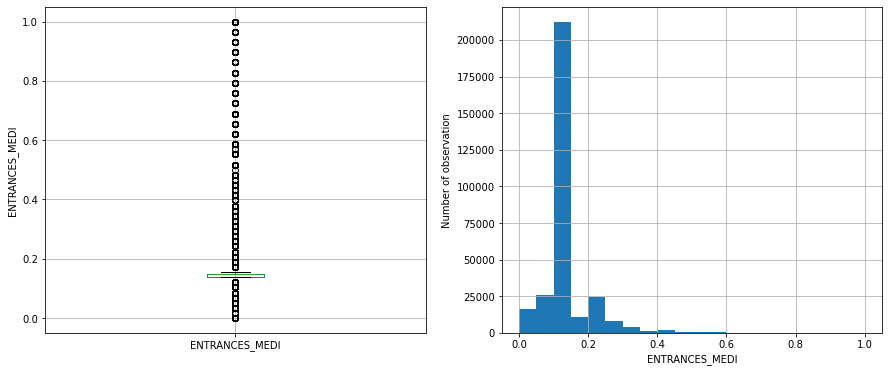

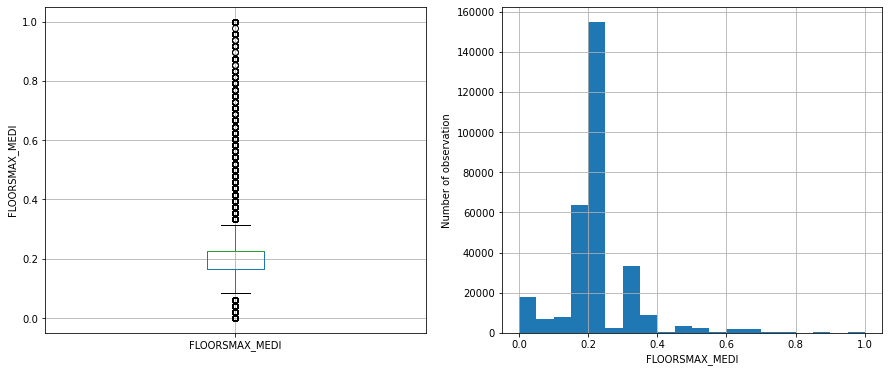

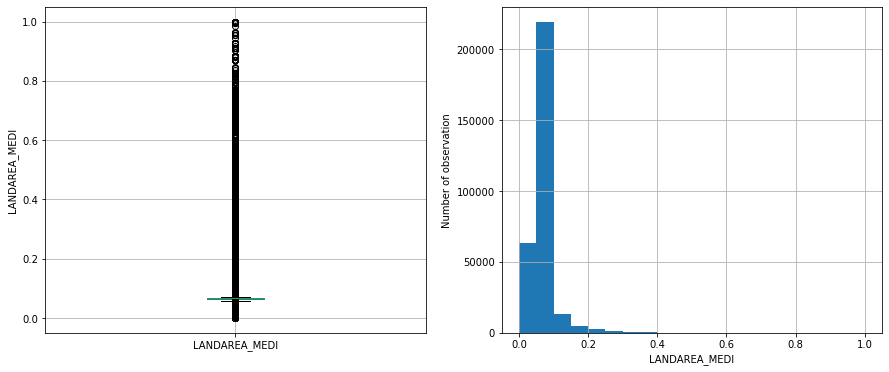

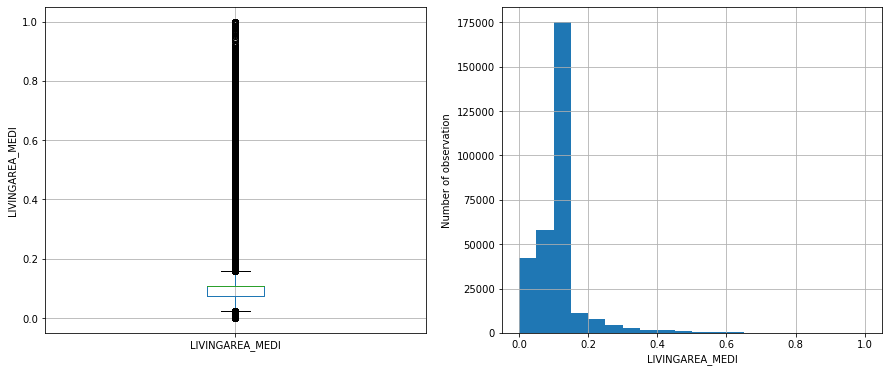

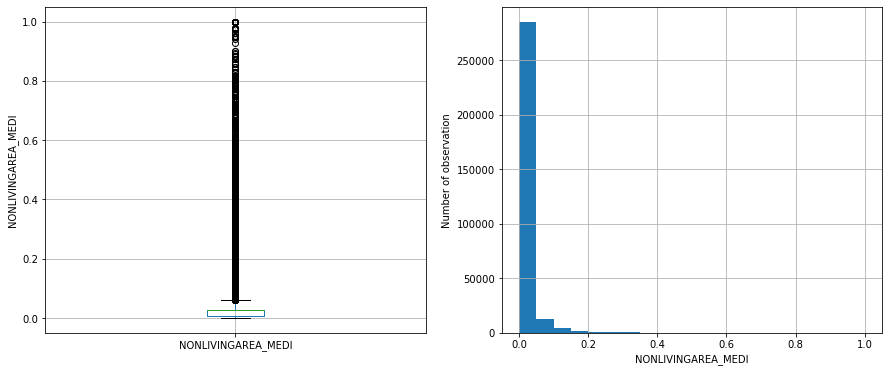

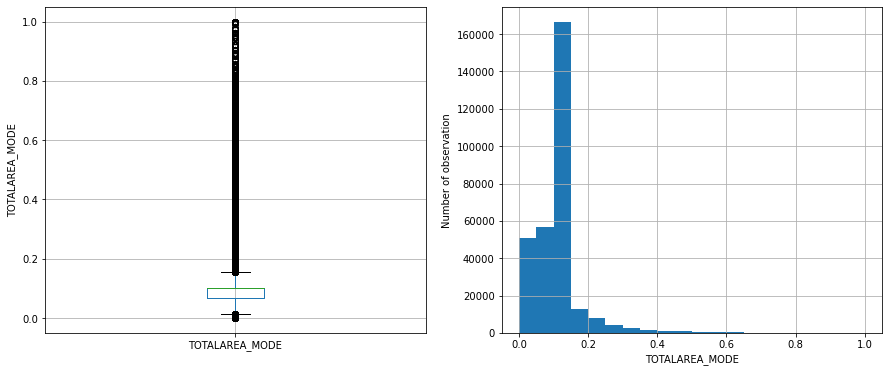

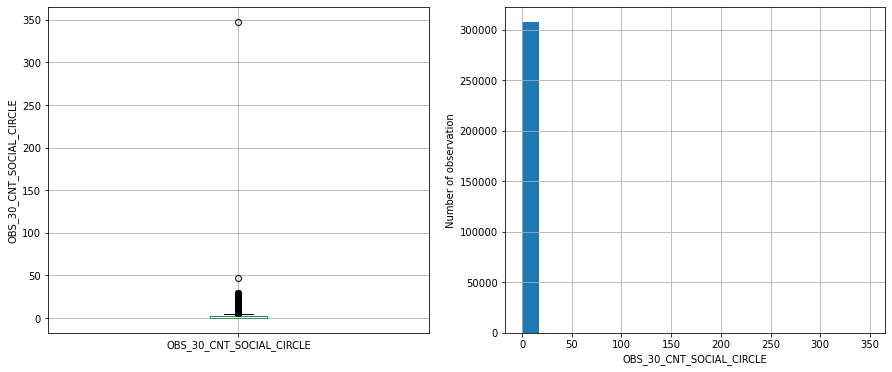

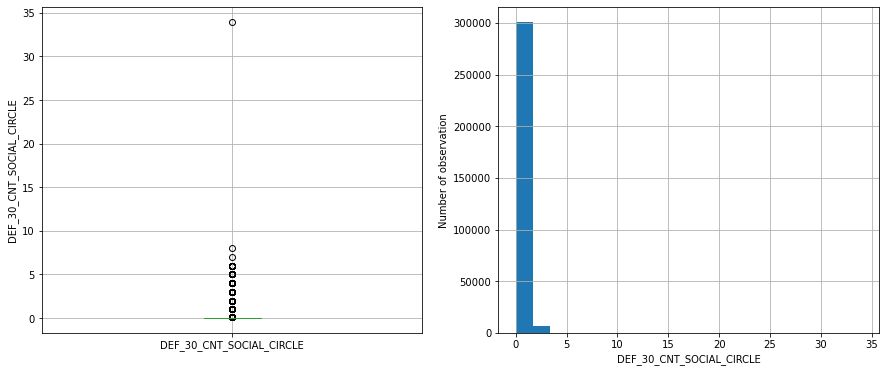

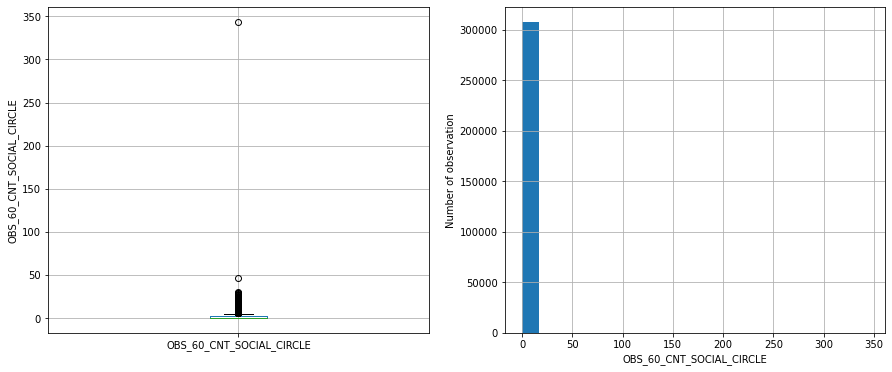

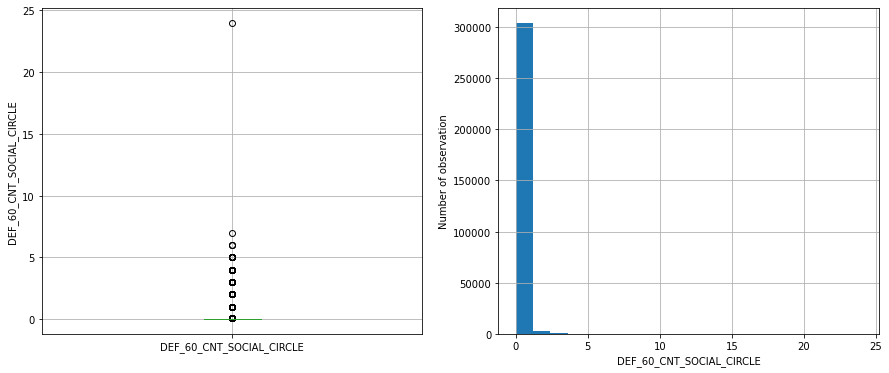

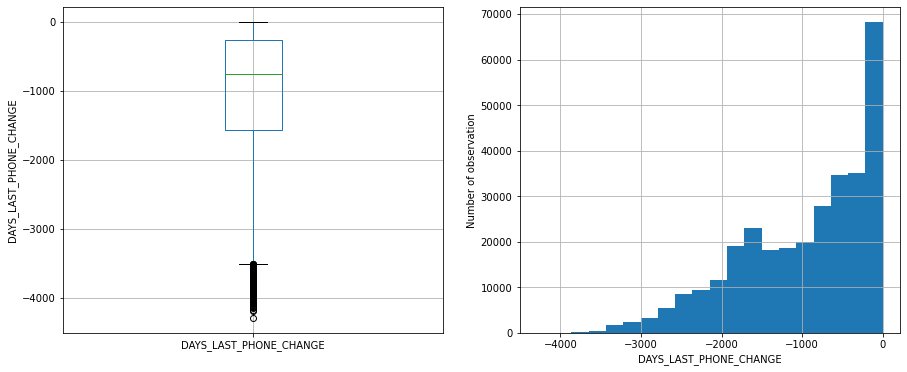

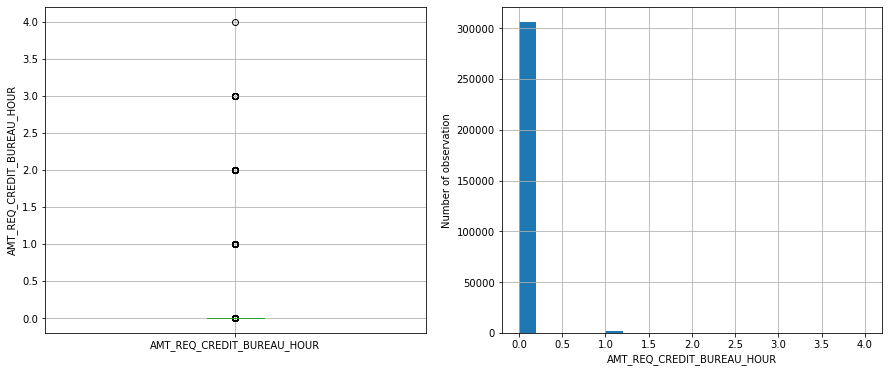

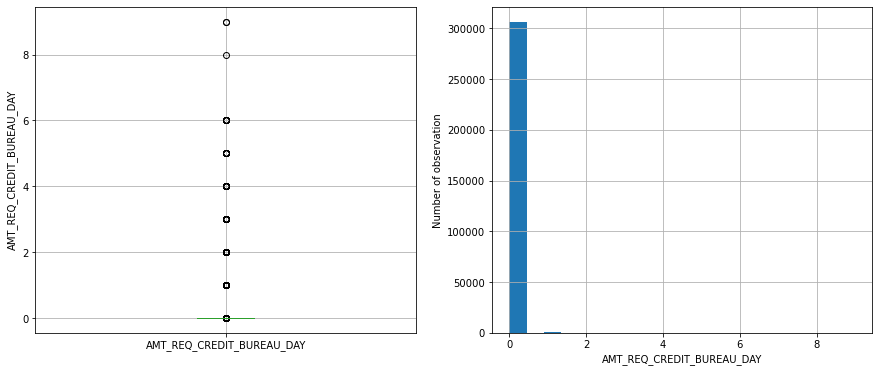

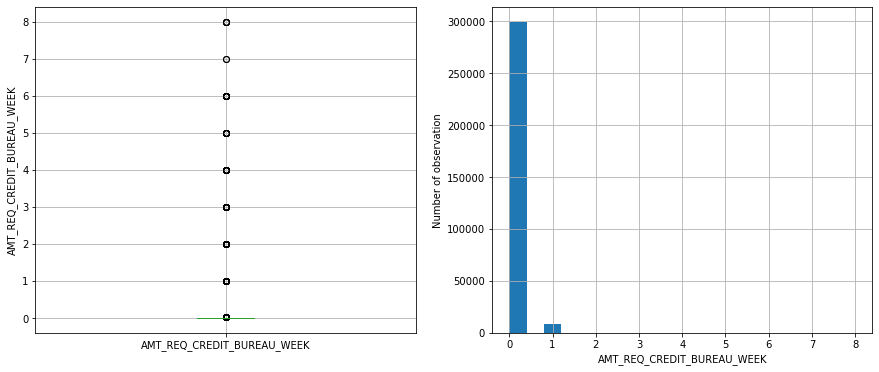

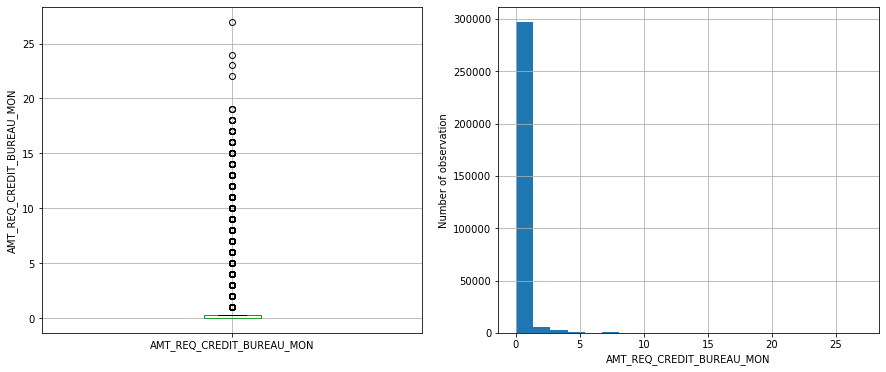

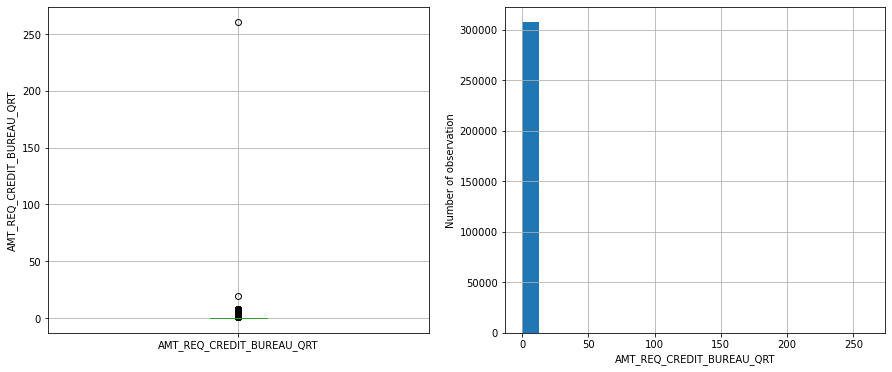

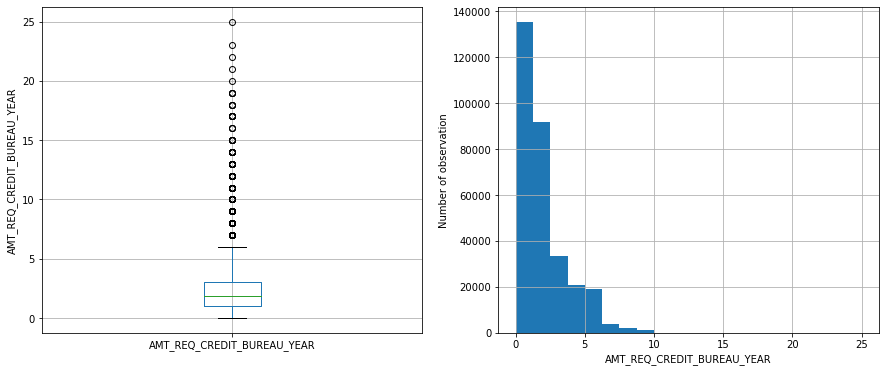

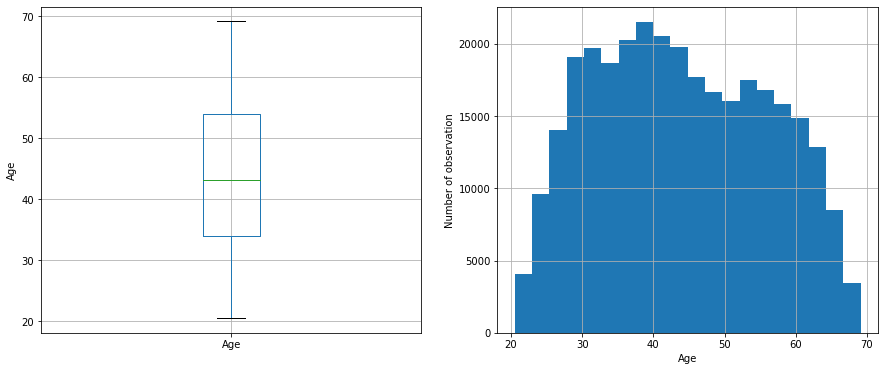

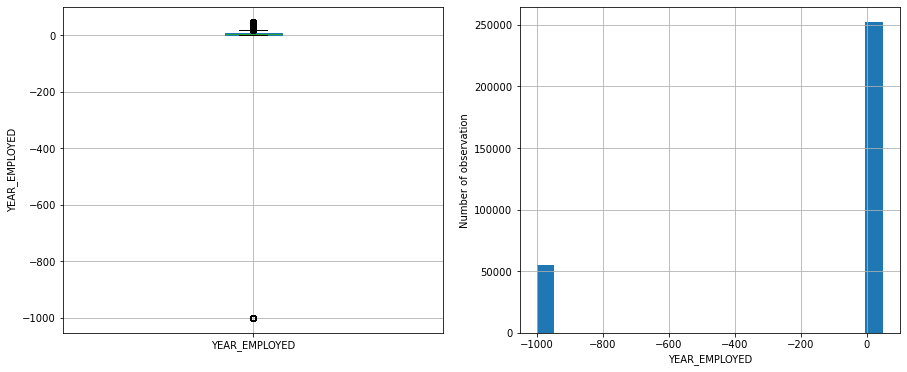

In [36]:
for var in continuous:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = data.boxplot(column=var)
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = data[var].hist(bins=20)
    fig.set_ylabel('Number of observation')
    fig.set_xlabel(var)

    plt.show()

In [37]:
data['CODE_GENDER']=data['CODE_GENDER'].replace('XNA','Unknown_Gender')

In [38]:
data1['CODE_GENDER']=data1['CODE_GENDER'].replace('XNA','Unknown_Gender')

In [39]:
data['CODE_GENDER'].unique()

array(['M', 'F', 'Unknown_Gender'], dtype=object)

In [40]:
data['TARGET'].unique()

array([1, 0], dtype=int64)

### Encode my categorical columns values

In [41]:
categorical=[var for var in data.columns if data[var].dtypes=='object']

In [42]:
categorical1=[var for var in data1.columns if data1[var].dtypes=='object']

In [43]:
for var in categorical:
    print("'{}' has {} labels".format(var,len(data[var].unique())))

'NAME_CONTRACT_TYPE' has 2 labels
'CODE_GENDER' has 3 labels
'FLAG_OWN_CAR' has 2 labels
'FLAG_OWN_REALTY' has 2 labels
'NAME_TYPE_SUITE' has 8 labels
'NAME_INCOME_TYPE' has 8 labels
'NAME_EDUCATION_TYPE' has 5 labels
'NAME_FAMILY_STATUS' has 6 labels
'NAME_HOUSING_TYPE' has 6 labels
'OCCUPATION_TYPE' has 19 labels
'WEEKDAY_APPR_PROCESS_START' has 7 labels
'ORGANIZATION_TYPE' has 58 labels
'HOUSETYPE_MODE' has 4 labels
'WALLSMATERIAL_MODE' has 8 labels
'EMERGENCYSTATE_MODE' has 3 labels


In [44]:
for var in categorical:
    if len(data[var].unique())>2:
        nts=pd.get_dummies(data[var],drop_first=True)
        data=pd.concat([data,nts],axis=1)
        data= data.drop([var],axis=1)
        
    else :
        data[var]=pd.get_dummies(data[var],drop_first=True)
       
        
        
        

In [45]:
for var in categorical1:
    if len(data1[var].unique())>2:
        nts=pd.get_dummies(data1[var],drop_first=True)
        data1=pd.concat([data1,nts],axis=1)
        data1= data1.drop([var],axis=1)
        
    else :
        data1[var]=pd.get_dummies(data1[var],drop_first=True)

In [46]:
data['TARGET'].unique()

array([1, 0], dtype=int64)

In [47]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,XNA,specific housing,terraced house,Mixed,Monolithic,Others,Panel,"Stone, brick",Wooden,Yes
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0,0,0,1,0,0
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0,0,0,0,0,0


### Scaling of columns with raw data which varies widely

In [48]:
data['TARGET'].unique()

array([1, 0], dtype=int64)

In [49]:
#put the value of our continuous variables between 0 and 1 by using min max scaler
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))

for var in continuous:
    data[[var]]=scaler.fit_transform(data[[var]])
    


In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))

for var in continuous:
    data1[[var]]=scaler.fit_transform(data1[[var]])

### SEPARATE TRAIN TEST SET

In [51]:
target_variable =data['TARGET']

In [52]:
data, data1 = data.align(data1, join = 'inner', axis = 1)

In [53]:
data['TARGET']=target_variable

In [55]:
X=data.loc[:, data.columns != 'TARGET']
X=X.drop(['SK_ID_CURR'],axis=1)

In [56]:
Y=data['TARGET']
Y.unique()

array([1, 0], dtype=int64)

In [57]:
X.to_csv("train.csv")
Y.to_csv("test.csv")